In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import sys
sys.path.append("./FUnIE-GAN/PyTorch/")
from nets import funiegan

import time
import numpy as np
from PIL import Image
from glob import glob
from ntpath import basename
from os.path import join, exists
# pytorch libs
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image
import torchvision.transforms as transforms

In [2]:
is_cuda = torch.cuda.is_available()
Tensor = torch.cuda.FloatTensor if is_cuda else torch.FloatTensor 
is_cuda

False

In [3]:
model = funiegan.GeneratorFunieGAN()

In [6]:
model_path = "./FUnIE-GAN/PyTorch/models/funie_generator.pth"
model.load_state_dict(torch.load(model_path,map_location=torch.device('cpu')))
if is_cuda: model.cuda()
model.eval()
print ("Loaded model from %s" % (model_path))

Loaded model from ./FUnIE-GAN/PyTorch/models/funie_generator.pth


In [33]:
## data pipeline
img_width, img_height, channels = 256, 256, 3
transforms_ = [transforms.Resize((img_height, img_width), transforms.InterpolationMode.BICUBIC),
               transforms.ToTensor(),
               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),]
transform = transforms.Compose(transforms_)

In [34]:
data_dir = "./FUnIE-GAN/data/test/A/"
test_files = sorted(glob(join(data_dir, "*.*")))
test_files

['./FUnIE-GAN/data/test/A/1.jpg',
 './FUnIE-GAN/data/test/A/10.jpg',
 './FUnIE-GAN/data/test/A/11.jpg',
 './FUnIE-GAN/data/test/A/12.jpg',
 './FUnIE-GAN/data/test/A/13.jpg',
 './FUnIE-GAN/data/test/A/14.jpg',
 './FUnIE-GAN/data/test/A/15.jpg',
 './FUnIE-GAN/data/test/A/16.jpg',
 './FUnIE-GAN/data/test/A/17.jpg',
 './FUnIE-GAN/data/test/A/18.jpg',
 './FUnIE-GAN/data/test/A/19.jpg',
 './FUnIE-GAN/data/test/A/2.jpg',
 './FUnIE-GAN/data/test/A/20.jpg',
 './FUnIE-GAN/data/test/A/21.jpg',
 './FUnIE-GAN/data/test/A/22.jpg',
 './FUnIE-GAN/data/test/A/23.jpg',
 './FUnIE-GAN/data/test/A/3.jpg',
 './FUnIE-GAN/data/test/A/4.jpg',
 './FUnIE-GAN/data/test/A/5.jpg',
 './FUnIE-GAN/data/test/A/6.jpg',
 './FUnIE-GAN/data/test/A/7.jpg',
 './FUnIE-GAN/data/test/A/8.jpg',
 './FUnIE-GAN/data/test/A/9.jpg']

In [62]:
path = './FUnIE-GAN/data/test/A/1.jpg'
inp_img = transform(Image.open(path))
inp_img = Variable(inp_img).type(Tensor).unsqueeze(0)
gen_img = model(inp_img)

In [71]:
gen_img.min()

tensor(-0.9486, grad_fn=<MinBackward1>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


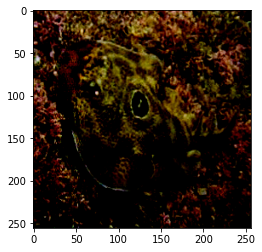

In [74]:
plt.imshow(gen_img.squeeze().data.permute(1, 2, 0).numpy())

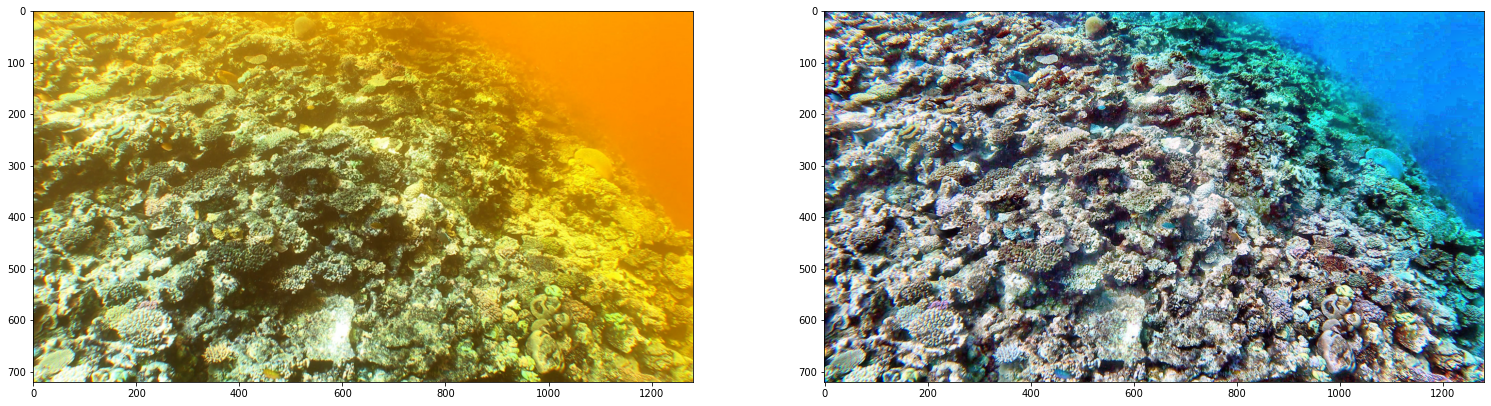

In [98]:
import cv2
import matplotlib.pyplot as plt
path = '../../data/tensorflow-great-barrier-reef/train_images/video_0/16.jpg'
img = cv2.imread(str(path))#[...,::-1]
fig,axes = plt.subplots(1,2,figsize=(26,9))
axes[0].imshow(img,interpolation="bilinear")
clahe = cv2.createCLAHE(clipLimit=7, tileGridSize=(14, 14))
for i in range(3):
    img[:, :, i] = clahe.apply((img[:, :, i]))
img = img[...,::-1]
axes[1].imshow(img)
plt.show()

In [95]:
cv2.imread(str(path))[...,::-1].shape

(720, 1280, 3)

In [96]:
cv2.imread(str(path))[...].shape

(720, 1280, 3)